In [8]:
from glob import glob
import plantcv as pcv
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
paths = glob(os.getcwd() + '/images/*/*.JPG')

In [57]:
img = cv2.imread(paths[1])
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[:,:,0]/255,lab_img[:,:,1]/255, lab_img[:,:,2]/255

mask = np.zeros(l.shape)
cond = np.logical_or(l > 0.5, b > 0.95)
mask[ b > 0.7] = 1

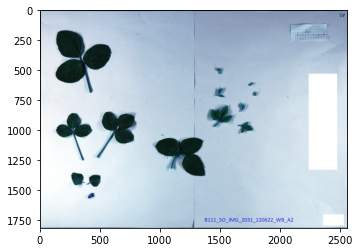

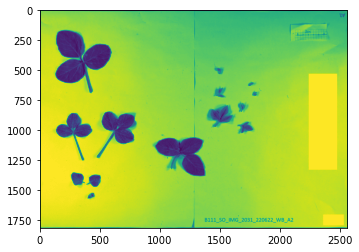

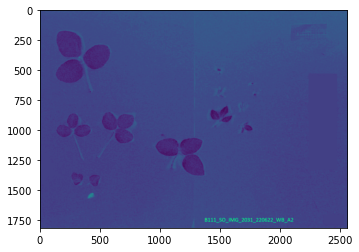

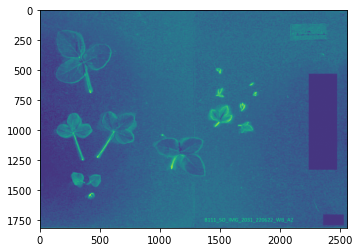

In [73]:
for i in [img, l, a, b]:
    plt.imshow(i)
    plt.show()

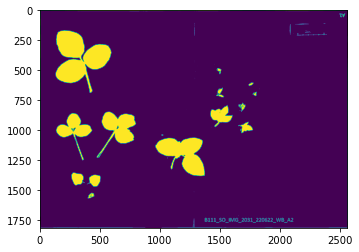

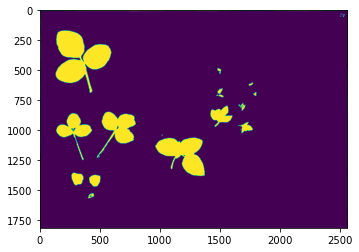

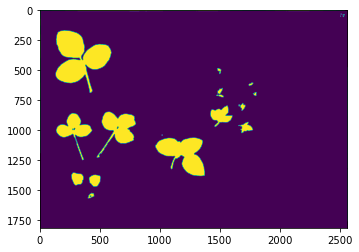

In [92]:
def apply_thresh(img, l_factor = 0.45, b_factor = 0.65, k_size = 5, closing = False):
    
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = lab_img[:,:,0]/255,lab_img[:,:,1]/255, lab_img[:,:,2]/255

    mask = np.zeros(l.shape)
    cond = np.logical_or(l < l_factor, b > b_factor)
    mask[ cond ] = 255

    # remove noise in the background
    kernel = np.ones((k_size,k_size),np.uint8)
    output = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # close retrieved shapes
    if closing:
        output = cv2.morphologyEx(output, cv2.MORPH_CLOSE, kernel)
    
    return output